<a href="https://colab.research.google.com/github/2003MADHAV/Pattern_Anomaly_Dection_Experiment/blob/main/CPU_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

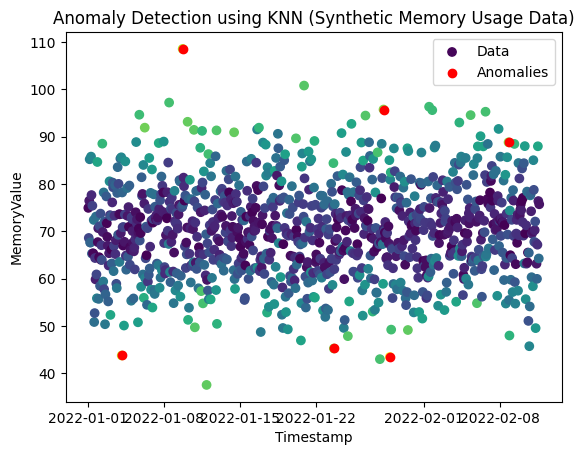

Anomalies:
              Timestamp  MemoryValue  PredictionError
74  2022-01-04 02:00:00    43.802549        25.833495
209 2022-01-09 17:00:00   108.527315        25.351272
544 2022-01-23 16:00:00    45.283555        23.276255
654 2022-01-28 06:00:00    95.733598        23.191412
668 2022-01-28 20:00:00    43.490302        28.380974
931 2022-02-08 19:00:00    88.811571        23.584796


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Generate synthetic memory usage data
np.random.seed(42)
n_samples = 1000

data = {
    'Timestamp': pd.date_range(start='2022-01-01', periods=n_samples, freq='H'),
    'MemoryValue': np.random.normal(loc=70, scale=10, size=n_samples),  # Adjust loc and scale as needed
}

df = pd.DataFrame(data)

# Define features
df['NumericTimestamp'] = df['Timestamp'].apply(lambda x: x.timestamp())
features = ['NumericTimestamp']

# Train KNN model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(df[features], df['MemoryValue'])

# Predict on the training data
df['PredictedMemoryValue'] = model.predict(df[features])

# Calculate prediction error
df['PredictionError'] = abs(df['PredictedMemoryValue'] - df['MemoryValue'])

# Identify anomalies based on prediction errors
threshold = df['PredictionError'].mean() + 3 * df['PredictionError'].std()  # Adjust the threshold as needed
anomalies = df[df['PredictionError'] > threshold]

# Plot anomalies
plt.scatter(df['Timestamp'], df['MemoryValue'], c=df['PredictionError'], cmap='viridis', label='Data')
plt.scatter(anomalies['Timestamp'], anomalies['MemoryValue'], color='red', label='Anomalies')
plt.title('Anomaly Detection using KNN (Synthetic Memory Usage Data)')
plt.xlabel('Timestamp')
plt.ylabel('MemoryValue')
plt.legend()
plt.show()

# Print anomalies
print("Anomalies:")
print(anomalies[['Timestamp', 'MemoryValue', 'PredictionError']])